# Importing Libraries

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels as sm
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot

# Importing data for our model

In [2]:
measured = pd.read_csv('Measured_Data.txt', sep=',')
measured.iloc[:, 0] = pd.to_datetime(measured.iloc[:, 0])
measured.set_index('Datetime', inplace=True)

In [3]:
measured.head()

,BuildingOccupied,OutdoorTemperature,OutdoorRelativeHumidity,ThermalCoolingLoad
Datetime,,,,
2017-02-27 00:00:00,0,44.240,85.33,0.0
2017-02-27 00:15:00,0,46.238,82.58,0.0
2017-02-27 00:30:00,0,50.630,74.88,0.0
2017-02-27 00:45:00,0,49.748,77.29,0.0
2017-02-27 01:00:00,0,50.234,76.31,0.0


In [4]:
predicted = pd.read_csv('Predicted_Weather.txt', sep=',')
predicted['Datetime'] = pd.to_datetime(predicted['Datetime'])
predicted.set_index('Datetime', inplace=True)

In [5]:
predicted.head()

,BuildingOccupied,OutdoorTemperature,OutdoorRelativeHumidity
Datetime,,,
2018-01-01 00:00:00,0,48.2,87
2018-01-01 00:30:00,0,48.2,87
2018-01-01 01:00:00,0,50.0,82
2018-01-01 01:30:00,0,50.0,82
2018-01-01 02:00:00,0,50.0,82


# EDA (Exploratory Data Analysis)

# Visualising the data

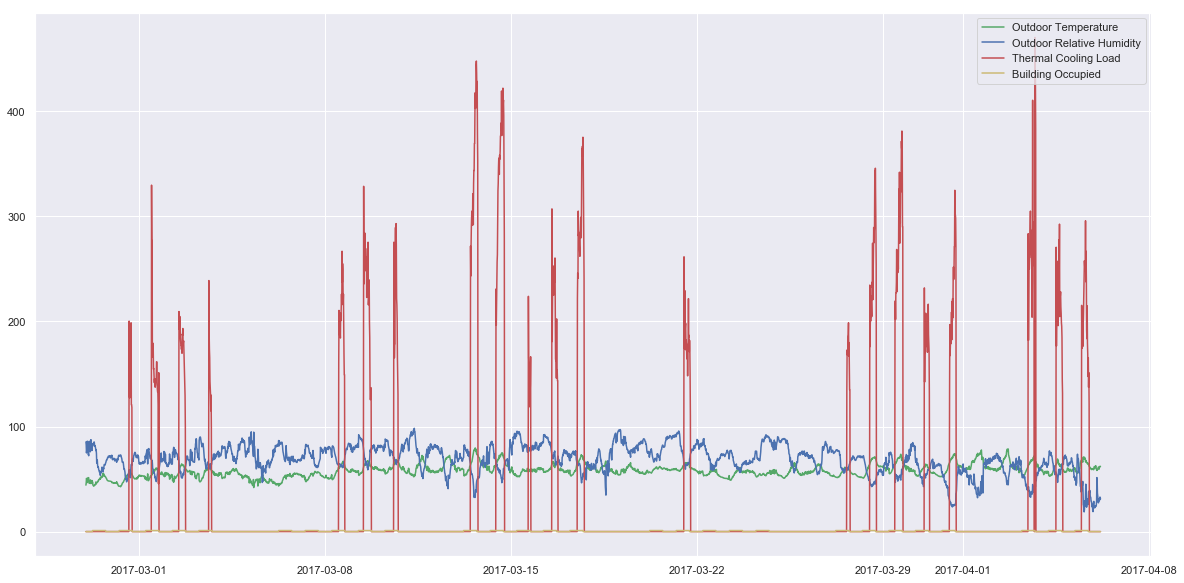

In [172]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.plot(measured.OutdoorTemperature, '-g', label='Outdoor Temperature')
plt.plot(measured.OutdoorRelativeHumidity, '-b', label='Outdoor Relative Humidity')
plt.plot(measured.ThermalCoolingLoad, '-r', label='Thermal Cooling Load')
plt.plot(measured.BuildingOccupied, '-y', label='Building Occupied')
plt.legend(loc=1)
plt.show()

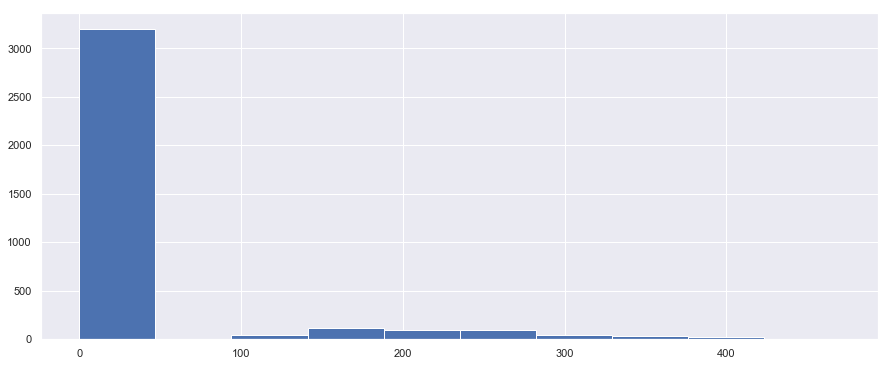

In [249]:
measured.ThermalCoolingLoad.hist(figsize=(15, 6))

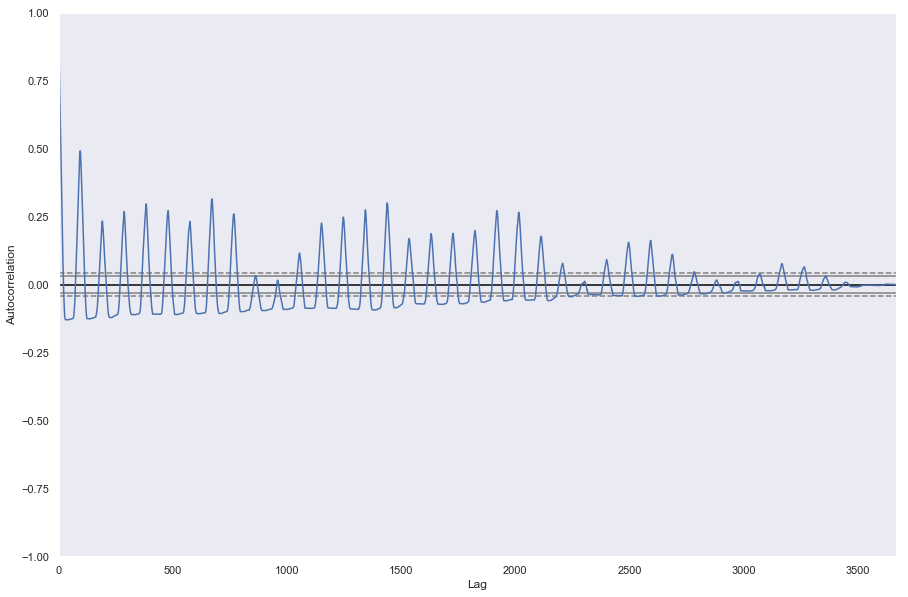

In [253]:
fig = plt.figure(figsize=(15, 10)) 
autocorrelation_plot(measured.ThermalCoolingLoad)

## Analysing

In [7]:
measured.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3665 entries, 2017-02-27 00:00:00 to 2017-04-06 04:00:00
Data columns (total 4 columns):
BuildingOccupied           3665 non-null int64
OutdoorTemperature         3665 non-null float64
OutdoorRelativeHumidity    3665 non-null float64
ThermalCoolingLoad         3665 non-null float64
dtypes: float64(3), int64(1)
memory usage: 143.2 KB


In [8]:
measured.describe()

,BuildingOccupied,OutdoorTemperature,OutdoorRelativeHumidity,ThermalCoolingLoad
count,3665.000000,3665.000000,3665.000000,3665.000000
mean,0.366712,57.937175,68.648988,29.404284
std,0.481973,5.904123,13.494317,82.067998
min,0.000000,41.900000,18.750000,0.000000
25%,0.000000,54.068000,61.740000,0.000000
50%,0.000000,57.650000,69.540000,0.000000
75%,1.000000,60.944000,78.190000,0.000000
max,1.000000,79.592000,98.280000,470.300000


* Checking the average of individual pair of months
* Average temprature increase is more in April as compared to from Feb and March. This shows that temperature increases as weather changes to summer.

In [9]:
feb_mar = measured['2017-02':'2017-03']

In [10]:
feb_mar.ThermalCoolingLoad.mean()

28.156976010101015

In [11]:
mar_apr = measured['2017-03': '2017-04']

In [12]:
mar_apr.ThermalCoolingLoad.mean()

30.57302044342069

# Using supervised learning

In [14]:
df = measured.copy()

In [15]:
df1 = df.reset_index()

In [16]:
df1.head()

,Datetime,BuildingOccupied,OutdoorTemperature,OutdoorRelativeHumidity,ThermalCoolingLoad
0,2017-02-27 00:00:00,0,44.240,85.33,0.0
1,2017-02-27 00:15:00,0,46.238,82.58,0.0
2,2017-02-27 00:30:00,0,50.630,74.88,0.0
3,2017-02-27 00:45:00,0,49.748,77.29,0.0
4,2017-02-27 01:00:00,0,50.234,76.31,0.0


In [17]:
X = df1[['BuildingOccupied', 'OutdoorTemperature', 'OutdoorRelativeHumidity']]
y = df1['ThermalCoolingLoad']

In [18]:
testing = predicted[['BuildingOccupied', 'OutdoorTemperature', 'OutdoorRelativeHumidity']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

* Linear Regression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

* Decision Tree

In [22]:
dt = DecisionTreeRegressor()

In [23]:
dt.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

* Random Forest

In [24]:
rf = RandomForestRegressor()

In [25]:
rf.fit(X, y)

C:\Users\rahul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [26]:
out = pd.DataFrame({"LR":lr.predict(testing), 
              "DT":dt.predict(testing),
             "RF":rf.predict(testing)}, index=predicted.index)

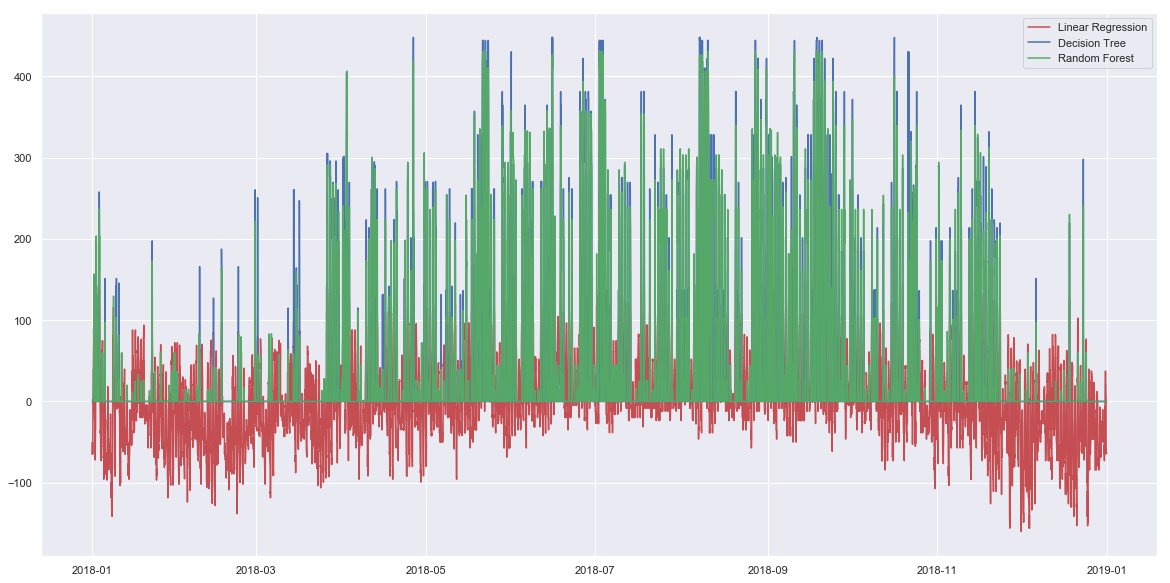

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(out.LR, '-r', label='Linear Regression')
plt.plot(out.DT, '-b', label='Decision Tree')
plt.plot(out.RF, '-g', label='Random Forest')
plt.legend(loc=1)

## Changing negative outputs of linear regression to absolute values

In [255]:
out["LR"] = out["LR"].apply(np.abs)

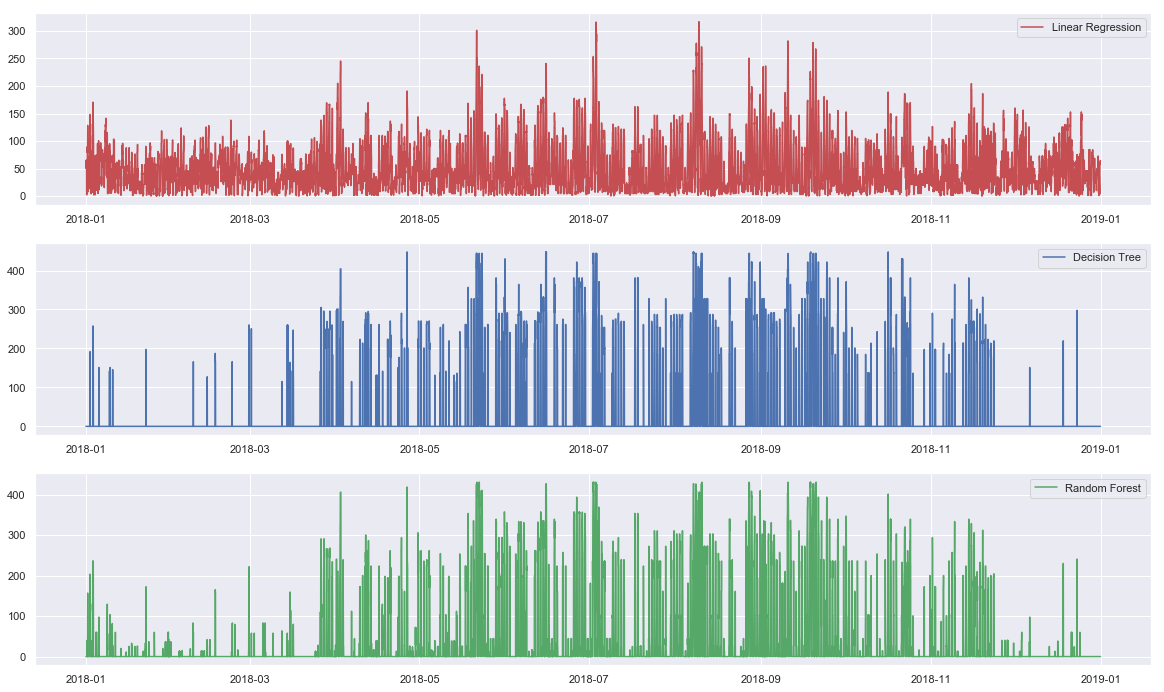

In [262]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 1, 1)
plt.plot(out.LR, '-r', label='Linear Regression')
plt.legend(loc=1)

plt.subplot(3, 1, 2)
plt.plot(out.DT, '-b', label='Decision Tree')
plt.legend(loc=1)

plt.subplot(3, 1, 3)
plt.plot(out.RF, '-g', label='Random Forest')
plt.legend(loc=1)

* `NOTE:` Linear regression model have predicited some values to be zero

# Applying ARIMAX model

Link to documentation of `adfuller`: <a href='http://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html'>adfuller</a>

* Augmented Dickey Fuller (ADF) test

In [28]:
print(sm.tsa.stattools.adfuller(measured.OutdoorTemperature))
print(sm.tsa.stattools.adfuller(measured.OutdoorRelativeHumidity))
print(sm.tsa.stattools.adfuller(measured.ThermalCoolingLoad))

(-8.150918049101298, 9.701542781562188e-13, 13, 3651, {'1%': -3.4321423592450104, '5%': -2.862331964581231, '10%': -2.567191574740688}, 10334.834359701013)
(-6.724778945003755, 3.411466940832118e-09, 12, 3652, {'1%': -3.432141868110989, '5%': -2.8623317476360577, '10%': -2.567191459246325}, 17281.663006331542)
(-8.999282454874562, 6.564171934943008e-15, 29, 3635, {'1%': -3.432150254165979, '5%': -2.8623354519441797, '10%': -2.567193431297053}, 34357.589868822775)


* ARIMA model is defined as `ARIMA(p, d, q)`. The three parameters p, d and q are seasonality, trend, and noise in data.

In [29]:
df.index.freq = '15T'

In [30]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

### Applying grid search for finding best p, d and q

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(endog=df['ThermalCoolingLoad'],
                          exog=df[['OutdoorTemperature', 'OutdoorRelativeHumidity']].values,
                          order=param, 
                          seasonal_order=param_seasonal, 
                          enforce_stationarity=False, 
                          enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [112]:
print(sm.tsa.stattools.grangercausalitytests(df[['OutdoorTemperature','OutdoorRelativeHumidity']].dropna(),1))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0032  , p=0.9547  , df_denom=3645, df_num=1
ssr based chi2 test:   chi2=0.0032  , p=0.9547  , df=1
likelihood ratio test: chi2=0.0032  , p=0.9547  , df=1
parameter F test:         F=0.0032  , p=0.9547  , df_denom=3645, df_num=1
{1: ({'ssr_ftest': (0.0032204368050650287, 0.9547483365636029, 3645.0, 1), 'ssr_chi2test': (0.003223087370336687, 0.9547266265797677, 1), 'lrtest': (0.003223085943318438, 0.954726636591373, 1), 'params_ftest': (0.0032204368034114495, 0.9547483365749633, 3645.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000227269B7390>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000227269B7710>, array([[0., 1., 0.]])])}


In [113]:
print(sm.tsa.stattools.grangercausalitytests(df[['OutdoorTemperature','OutdoorRelativeHumidity']].dropna(),1))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0032  , p=0.9547  , df_denom=3645, df_num=1
ssr based chi2 test:   chi2=0.0032  , p=0.9547  , df=1
likelihood ratio test: chi2=0.0032  , p=0.9547  , df=1
parameter F test:         F=0.0032  , p=0.9547  , df_denom=3645, df_num=1
{1: ({'ssr_ftest': (0.0032204368050650287, 0.9547483365636029, 3645.0, 1), 'ssr_chi2test': (0.003223087370336687, 0.9547266265797677, 1), 'lrtest': (0.003223085943318438, 0.954726636591373, 1), 'params_ftest': (0.0032204368034114495, 0.9547483365749633, 3645.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000227269B7978>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000227269B7588>, array([[0., 1., 0.]])])}


# Applying ARIMAX 

* Exogenous variable is `ThermalCoolingLoad`
* Endogenoud variables are `OutdoorTemperature`, `OutdoorRelativeHumidity` and `BuildingOccupied`.

In [235]:
df['lagA'] = df['OutdoorTemperature'].shift()
df['lagB'] = df['OutdoorRelativeHumidity'].shift()
df['lagC'] = df['BuildingOccupied'].shift()
df.dropna(inplace=True)
model = sm.tsa.ARIMA(endog=df['ThermalCoolingLoad'], exog=df[['lagA', 'lagB', 'lagC']].values, order=[2,0,2], freq='15T')
results = model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:     ThermalCoolingLoad   No. Observations:                 3625
Model:                     ARMA(2, 2)   Log Likelihood              -17127.715
Method:                       css-mle   S.D. of innovations             27.267
Date:                Thu, 21 Mar 2019   AIC                          34273.429
Time:                        00:24:47   BIC                          34329.190
Sample:                    02-27-2017   HQIC                         34293.294
                         - 04-06-2017                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -187.6643     46.172     -4.064      0.000    -278.161     -97.168
x1                           3.3735      0.586      5.758      0.000       2.225       4.

* Forecasting for new data

In [263]:
test = predicted.copy()
test['lagA'] = test['OutdoorTemperature']
test['lagB'] = test['OutdoorRelativeHumidity']
test['lagC'] = test['BuildingOccupied']
test.dropna(inplace=True)

In [268]:
pred = results.forecast(steps=len(test), exog=test[['lagA', 'lagB', 'lagC']])
test['Pred'] = pred[0]
test['Pred'] = test['Pred'].apply(np.abs)

* Plotting the forcasting
* Some forecast values were less than zero which can't be considered. So, these values changed to absolute values.

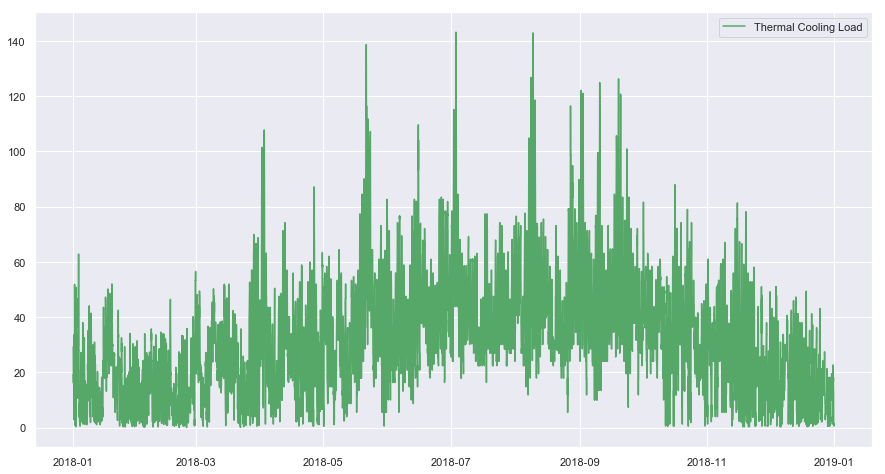

In [269]:
plt.figure(figsize=(15, 8))
plt.plot(test['Pred'], '-g', label='Thermal Cooling Load')
plt.legend(loc=1)

* Exporting the outputs of each model.

In [312]:
test['Pred'].to_csv('output/ARIMA_output.csv', index=True, header=['ThermalCoolingLoad'])
out['LR'].to_csv('output/LinearR_output.csv', index=True, header=['ThermalCoolingLoad'])
out['DT'].to_csv('output/DecisionT_output.csv', index=True, header=['ThermalCoolingLoad'])
out['RF'].to_csv('output/RandomF_output.csv', index=True, header=['ThermalCoolingLoad'])

# END!